In [5]:
#-----------------------------------------------------------------------
# diagonal.py
# Author: Rebecca Barber
# 
# simulates the expected revenue given the flow discussed in meeting
# on 2/11. see notes for more details
#-----------------------------------------------------------------------

import scipy.stats as st
from statistics import *
import matplotlib.pyplot as plt
from sys import argv
import numpy as np
from math import *
import pandas as pd
from plotnine import *
from random import * 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# ER draws

In [6]:
# draws value from ER curve
def er_draw():
	q = random()
	return 1/(1-q)

# draws d values from the ER curve
def draw_vals(d):
	vals = []
	for i in range(d):
		draw = er_draw()
		vals.append(draw)
	return vals

# Flow Simulation

In [7]:
# simulates flow given n bidders and m items
# essentially just arranging the n*m values and using
# the given mechanism to "star" values
def orig_flow(n, m):

	# need to get n*m values
    vals = draw_vals(n*m)
    
    # divide into 2 cols
    col1 = vals[0:n-1]
    col2 = vals[n:len(vals)-1]
    assert len(col1) == len(col2), "columns aren't the same size"
    
    # get largest "unstarred" value in each column
    highest_unstarred_col1 = 0
    highest_unstarred_col2 = 0
    for i in range(len(col1)):
        val_col1 = col1[i]
        val_col2 = col2[i]
        # item "starred" if it is bidder i's favorite
        if val_col1 > val_col2 and val_col2 > highest_unstarred_col2: 
            highest_unstarred_col2 = val_col2
        if val_col2 > val_col1 and val_col1 > highest_unstarred_col1:
            highest_unstarred_col1 = val_col1

    return highest_unstarred_col1 + highest_unstarred_col2

In [8]:
# simulates flow given n bidders and m items
# essentially just arranging the n*m values and using
# the given mechanism to "star" values
def diag_flow(n, m, eps):

	# need to get n*m values
    vals = draw_vals(n*m)
    
    # divide into 2 cols
    col1 = vals[0:n]
    col2 = vals[n:len(vals)]
    assert len(col1) == len(col2), "columns aren't the same size"
    # print('\nitem 1:', col1)
    # print('item 1:', col2)
    
    # get largest "unstarred" value in each column
    # need to compute \sum_j \max_i {virt_val_ij} 
    # virt_val_ij = 0 if j is i's favorite item
    # otherwise, = formula below
    highest_virt_val_col1 = 0
    highest_virt_val_col2 = 0
    for i in range(len(col1)):
        
        val_col1 = col1[i]
        val_col2 = col2[i]
        
        max_val = val_col1 if val_col1 > val_col2 else val_col2
        other_val = val_col2 if val_col1 > val_col2 else val_col1
        
        # print('max_val:', max_val, 'other_val:', other_val)
        
        # item 1 is the favorite item (max)
        # item 2 is "other"
        if val_col1 > val_col2:
            virt_val_col1 = 0 
            virt_val_col2 = (other_val*(max_val-other_val))/(max_val-eps*max_val*other_val)
        # item 1 is "other"
        # item 2 is the favorite item (max)
        else: 
            virt_val_col2 = 0 
            virt_val_col1 = (other_val*(max_val-other_val))/(max_val-eps*max_val*other_val)
            
        # print('virt_val_col1:', virt_val_col1, 'virt_val_col2:', virt_val_col2, '\n')
            
        if virt_val_col1 > highest_virt_val_col1: 
            highest_virt_val_col1 = virt_val_col1
        if virt_val_col2 > highest_virt_val_col2: 
            highest_virt_val_col2 = virt_val_col2
            
    # print('highest_virt_val_col1:', highest_virt_val_col1, 'highest_virt_val_col2:', highest_virt_val_col2)

    return highest_virt_val_col2 + highest_virt_val_col2

# Variable Updates

In [22]:
num_trials = 500000
min_bidders = 10
max_bidders = 1000
bidder_step = 10
num_items = 2
eps = 1/1000000

num_bidders = []
for i in range(min_bidders, max_bidders+1, bidder_step):
    num_bidders.append(i)
print(num_bidders)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000]


# Main

In [23]:
avg_diag_revs = []
avg_orig_revs = []

print('number of bidders:')
for n in range(min_bidders, max_bidders+1, bidder_step):
    print(n, end = "")

    # run num_trials for each # of bidders so we can 
    # take the average
    all_orig_revs = []
    all_diag_revs = []
    for i in range(num_trials):
        diag_rev = diag_flow(n, num_items, eps)
        orig_rev = orig_flow(n, num_items)
        all_diag_revs.append(diag_rev)  
        all_orig_revs.append(orig_rev)  
        
    mean_diag_rev = mean(all_diag_revs)
    mean_orig_rev = mean(all_orig_revs)
    avg_diag_revs.append(mean_diag_rev)
    avg_orig_revs.append(mean_orig_rev)
    
    print(':', mean_orig_rev, '(orig),', mean_diag_rev, '(diag)')

# save all of the data
csv_file = './data/orig_and_diag_flow' + str(min_bidders) + 'to' + \
    str(max_bidders) + 'bidders_' + str(bidder_step) + 'step_' + \
    str(num_trials) + 'trials.csv'

df = pd.DataFrame(columns=['num bidders', 'avg orig rev', 'avg diag rev'])
for i in range(len(num_bidders)):
    n = num_bidders[i]
    avg_orig_rev = avg_orig_revs[i]
    avg_diag_rev = avg_diag_revs[i]
    df = df.append({'num bidders': n, 'avg orig rev': avg_orig_rev, \
                    'avg diag rev': avg_diag_rev}, ignore_index=True)

df.to_csv(csv_file)

number of bidders:
10: 7.61100501453098 (orig), 4.6156405780525 (diag)
20: 10.997590137065192 (orig), 6.507241124617844 (diag)
30: 13.555887985145773 (orig), 8.009009255853067 (diag)
40: 15.726315838583037 (orig), 9.197365735930475 (diag)
50: 17.62077158074705 (orig), 10.252199609651601 (diag)
60: 19.31433738788123 (orig), 11.240852559428307 (diag)
70: 20.87779370465678 (orig), 12.097702852164808 (diag)
80: 22.232082061267228 (orig), 12.941416399757975 (diag)
90: 23.799821773918673 (orig), 13.791797376451957 (diag)
100: 24.9173174234373 (orig), 14.506749005981685 (diag)
110: 26.15428826746357 (orig), 15.187926031527956 (diag)
120: 27.332503101088946 (orig), 15.81746579032273 (diag)
130: 28.52920476780027 (orig), 16.54967080781539 (diag)
140: 29.676748471845745 (orig), 17.20733843751777 (diag)
150: 30.49828987354998 (orig), 17.728236525924483 (diag)
160: 31.5303674021771 (orig), 18.27209573638075 (diag)
170: 32.56204125356554 (orig), 18.820755848248414 (diag)
180: 33.741373612309154 (or

# Plotting

<Figure size 648x360 with 0 Axes>

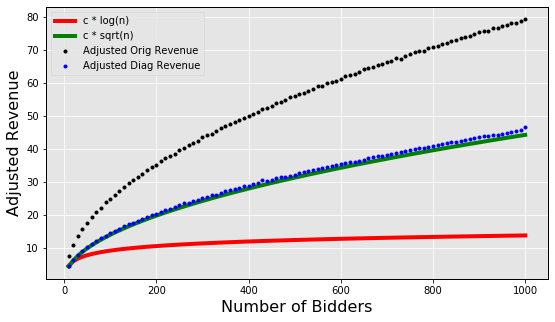

In [32]:
# plot the results
log_bench = [2*np.log(n) for n in num_bidders]
sqrt_bench = [1.4*np.sqrt(n) for n in num_bidders]

figure_name = './figures/orig_and_diag_flow' + str(min_bidders) + 'to' + \
    str(max_bidders) + 'bidders_' + str(bidder_step) + 'step_' + \
    str(num_trials) + 'trials.png'

plt.style.use('ggplot')
plt.figure(figsize=(9,5))
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black'}):
    plt.plot(num_bidders, log_bench, 'r-',
        num_bidders, sqrt_bench, 'g-',
         num_bidders, avg_orig_revs,'ko',
         num_bidders, avg_diag_revs,'bo',
         markersize=3, linewidth = 4)
plt.legend(['c * log(n)', 'c * sqrt(n)', 'Adjusted Orig Revenue', 'Adjusted Diag Revenue'])
xlab = plt.xlabel('Number of Bidders', fontsize=16)
ylab = plt.ylabel('Adjusted Revenue', fontsize=16)
xlab.set_color('black')
ylab.set_color('black')

In [33]:
orig_sqrt_fit = np.polyfit(np.sqrt(num_bidders), avg_orig_revs, 1, full = True)
diag_sqrt_fit = np.polyfit(np.sqrt(num_bidders), avg_diag_revs, 1, full = True)
print('orig sqrt fit: \na =', orig_sqrt_fit[0][0], '\nb =', orig_sqrt_fit[0][1], '\nerror =', orig_sqrt_fit[1][0])
print('\ndiag sqrt fit: \na =', diag_sqrt_fit[0][0], '\nb =', diag_sqrt_fit[0][1], '\nerror =', diag_sqrt_fit[1][0])

orig sqrt fit: 
a = 2.5106017495164936 
b = -0.15320266163971213 
error = 1.6437344886183665

diag sqrt fit: 
a = 1.4481322312579124 
b = -0.003020939032390293 
error = 1.9652875395651694
